# Prophet 예측모델

## y(t)=g(t)+s(t)+h(t)+εt

20:36:52 - cmdstanpy - INFO - Chain [1] start processing
20:37:39 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_33294/1049765189.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/tmp/ipykernel_33294/1049765189.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


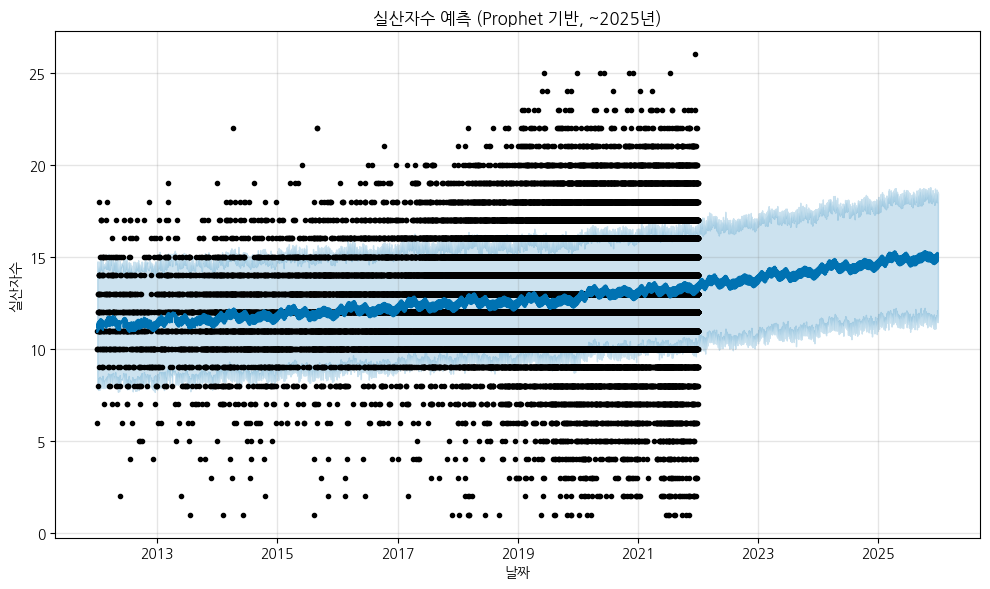

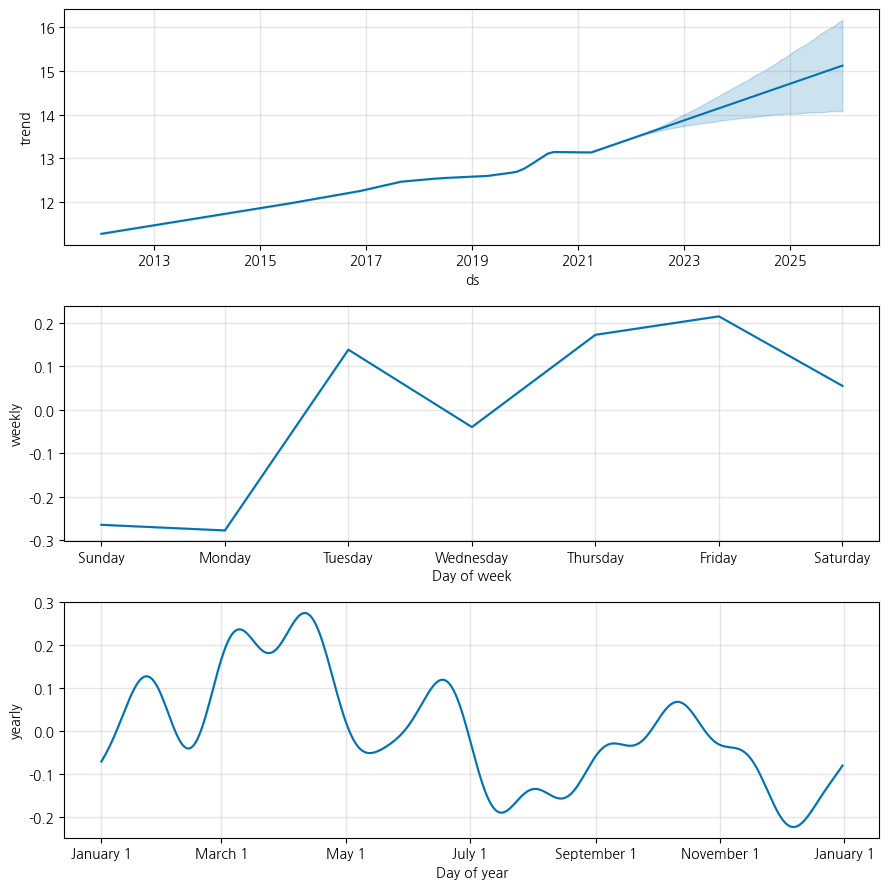

In [25]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
df = pd.read_csv('../../data/pigmom_data/prophet_data.csv')

# 날짜 형식 변환
df['분만일'] = pd.to_datetime(df['분만일'], errors='coerce')

# 결측값 제거
df = df.dropna(subset=['분만일', '실산자수', '이유두수'])

# 예측할 대상 선택 ('실산자수' or '이유두수')
target_column = '실산자수'  # ← 여기서 예측 항목 변경 가능

# Prophet용 포맷으로 리네이밍
prophet_df = df[['분만일', target_column]].rename(columns={'분만일': 'ds', target_column: 'y'})

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(prophet_df)

# Create future dataframe until end of 2025
# last_date = prophet_df['ds'].max()
future = model.make_future_dataframe(periods=1460)  # ~2 years for coverage until 2025
forecast = model.predict(future)

# Filter forecast until end of 2025
forecast_2025 = forecast[forecast['ds'] <= '2025-12-31']

# Plot forecast
fig1 = model.plot(forecast_2025)
plt.title('실산자수 예측 (Prophet 기반, ~2025년)')
plt.xlabel('날짜')
plt.ylabel('실산자수')
plt.grid(True)
plt.tight_layout()
fig1.show()

# 구성요소 분해 시각화 (Trend, Seasonality 등)
fig2 = model.plot_components(forecast_2025)
fig2.show()

20:38:28 - cmdstanpy - INFO - Chain [1] start processing
20:39:19 - cmdstanpy - INFO - Chain [1] done processing
20:39:24 - cmdstanpy - INFO - Chain [1] start processing
20:40:10 - cmdstanpy - INFO - Chain [1] done processing


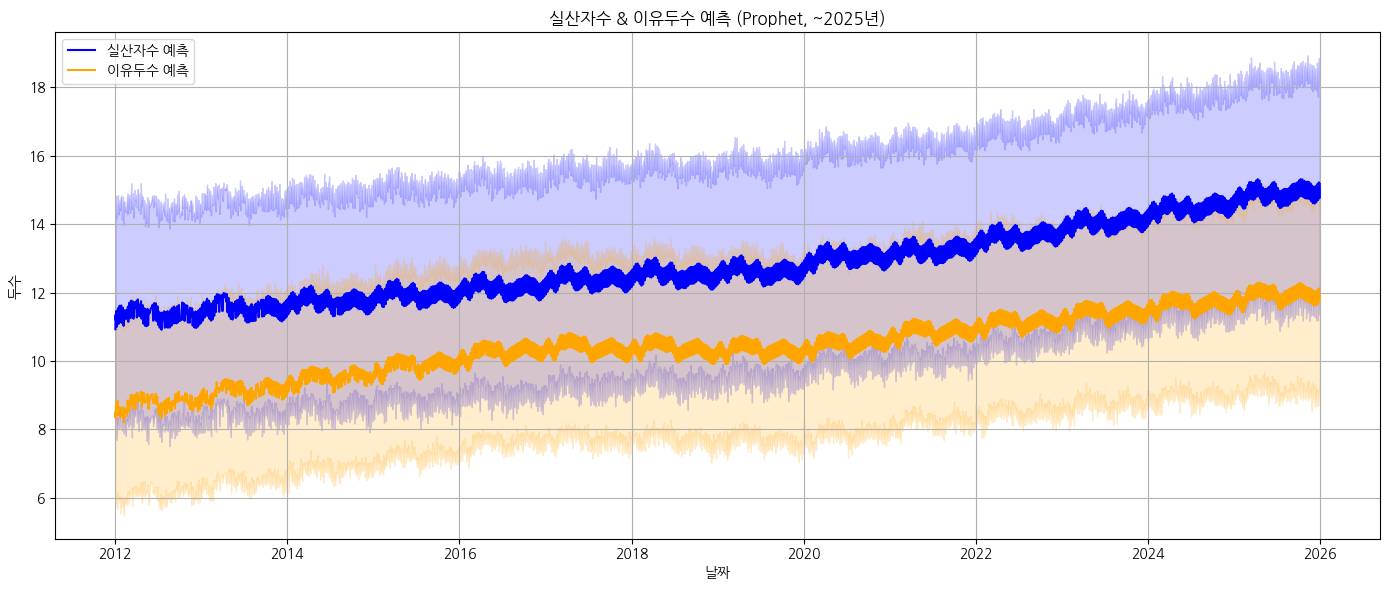

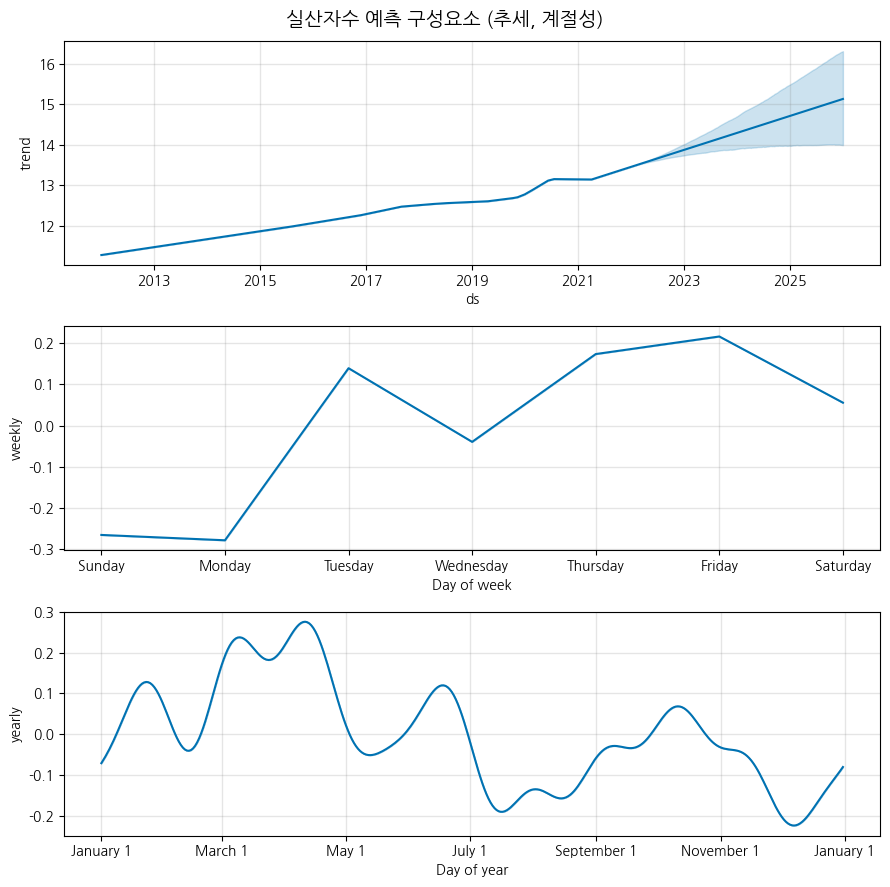

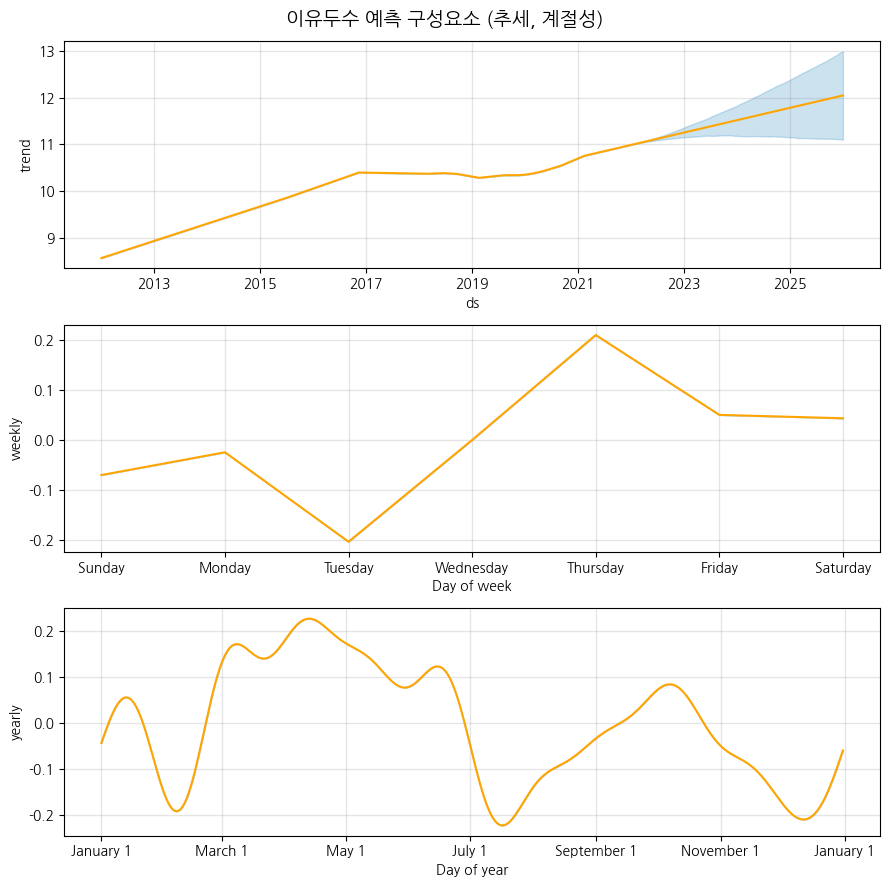

In [26]:
# --- 실산자수 Prophet 예측 ---
df_san = df[['분만일', '실산자수']].rename(columns={'분만일': 'ds', '실산자수': 'y'})
model_san = Prophet()
model_san.fit(df_san)
future_san = model_san.make_future_dataframe(periods=1460)
forecast_san = model_san.predict(future_san)
forecast_san = forecast_san[forecast_san['ds'] <= '2025-12-31']

# --- 이유두수 Prophet 예측 ---
df_iyu = df[['분만일', '이유두수']].rename(columns={'분만일': 'ds', '이유두수': 'y'})
model_iyu = Prophet()
model_iyu.fit(df_iyu)
future_iyu = model_iyu.make_future_dataframe(periods=1460)
forecast_iyu = model_iyu.predict(future_iyu)
forecast_iyu = forecast_iyu[forecast_iyu['ds'] <= '2025-12-31']

# --- 예측 결과 시각화 ---
plt.figure(figsize=(14, 6))
plt.plot(forecast_san['ds'], forecast_san['yhat'], label='실산자수 예측', color='blue')
plt.fill_between(forecast_san['ds'], forecast_san['yhat_lower'], forecast_san['yhat_upper'], color='blue', alpha=0.2)

plt.plot(forecast_iyu['ds'], forecast_iyu['yhat'], label='이유두수 예측', color='orange')
plt.fill_between(forecast_iyu['ds'], forecast_iyu['yhat_lower'], forecast_iyu['yhat_upper'], color='orange', alpha=0.2)

plt.title('실산자수 & 이유두수 예측 (Prophet, ~2025년)')
plt.xlabel('날짜')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 실산자수 구성요소 분해 시각화 ---
fig_san = model_san.plot_components(forecast_san)
fig_san.suptitle('실산자수 예측 구성요소 (추세, 계절성)', fontsize=14)
fig_san.tight_layout()
plt.show()

# --- 이유두수 구성요소 분해 시각화 ---
fig_iyu = model_iyu.plot_components(forecast_iyu)
lines = fig_iyu.get_axes()
for ax in lines:
    for line in ax.get_lines():
        line.set_color('orange')  # 오렌지색으로 변경
fig_iyu.suptitle('이유두수 예측 구성요소 (추세, 계절성)', fontsize=14)
fig_iyu.tight_layout()
plt.show()

In [27]:
forecast_san.to_csv('../../data/pigmom_data/forecast_san.csv', index=False)

In [28]:
forecast_iyu.to_csv('../../data/pigmom_data/forecast_iyu.csv', index=False)

## PSY